In [1]:
from SVDModel import SVDModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(3362)

In [2]:
# MovieLens Small
data_path_ml_small = './data/ml-latest-small/'
df_rating_ml_small = pd.read_csv(data_path_ml_small+'ratings.csv')
df_movies_ml_small = pd.read_csv(data_path_ml_small+'movies.csv')
m_movies_ml_small = df_movies_ml_small['movieId'].nunique()
n_users_ml_small = df_rating_ml_small['userId'].nunique()
n_ratings_ml_small = len(df_rating_ml_small)

df_movies_ml_small.insert(1, 'newMovieId', value=range(1,len(df_movies_ml_small)+1))
newMovieIdDict = {}
for index, movie in df_movies_ml_small.iterrows():
  newMovieIdDict[movie['movieId']] = movie['newMovieId']
df_rating_ml_small.replace({"movieId": newMovieIdDict}, inplace=True)
df_rating_ml_small['rating'] = df_rating_ml_small['rating'].astype(np.int64)

# print(df_rating_ml_small)
# print(df_movies_ml_small)
# print(n_users_ml_small)
# print(n_ratings_ml_small)
# print(m_movies_ml_small)

In [3]:
# Netflix Prize
data_path_netflix = './data/NetflixPrize/'
names = ['userId','rating','timestamp','movieId']
df_netflix = pd.read_csv(data_path_netflix+'data_1.txt', names=names, low_memory=False)
# df_netflix_2 = pd.read_csv(data_path_netflix+'data_2.txt', names=names, low_memory=False)
# df_netflix_3 = pd.read_csv(data_path_netflix+'data_3.txt', names=names, low_memory=False)
# df_netflix_4 = pd.read_csv(data_path_netflix+'data_4.txt', names=names, low_memory=False)
# df_netflix = pd.concat([df_netflix,df_netflix_2,df_netflix_3,df_netflix_4], names=names)
df_netflix['movieId'] = df_netflix['movieId'].fillna(method='ffill')
df_netflix = df_netflix.dropna()
df_netflix['rating'] = df_netflix['rating'].astype(np.int64)
df_netflix['movieId'] = df_netflix['movieId'].astype(np.int64)
df_netflix['userId'] = df_netflix['userId'].astype(np.int64)
df_netflix['timestamp'] = pd.to_datetime(df_netflix['timestamp']).view(dtype=np.int64) // 10 ** 9
# df_movies_netflix = pd.read_csv(data_path_netflix+'movie_titles.csv',encoding='latin-1',names=['movieId','release_year','title',])
m_movies_netflix = df_netflix['movieId'].nunique()
# m_movies_netflix = df_netflix['movieId'].max()
n_users_netflix = df_netflix['userId'].nunique()
# n_users_netflix = df_netflix['userId'].max()
n_ratings_netflix = len(df_netflix)
df_rating_netflix = df_netflix[['userId','movieId','rating','timestamp']].sample(10000)


# print(df_netflix_rating)
# print(df_netflix_movies)
# print(n_users_netflix)
# print(n_ratings_netflix)
# print(m_movies_netflix)

In [4]:
features = 3
lr = 0.001
epochs = 21
weight_decay = 0.02
stopping = 0.001

svd_ml_small = SVDModel(features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)
svd_netflix = SVDModel(features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)


In [5]:
svd_ml_small.data_loader(data=df_rating_ml_small, n_items = m_movies_ml_small, n_users=n_users_ml_small)
svd_ml_small.split(0.6,0.8)

User Item Matrix Shape: (610, 9724)
User Reference length: 610
Item Reference length: 9724


In [6]:
svd_netflix.data_loader(data=df_rating_netflix, n_items = m_movies_netflix, n_users=n_users_netflix)
svd_netflix.split(0.6,0.8)

User Item Matrix Shape: (9667, 1672)
User Reference length: 9667
Item Reference length: 1672


In [7]:
'''
Epoch :    1  | Train : 12.506  | Valid : 12.480  | Time : 6.11451s
Epoch :   11  | Train : 7.260  | Valid : 7.588  | Time : 63.33083s
Epoch :   21  | Train : 3.115  | Valid : 3.674  | Time : 75.85987s
Training stopped:
Epoch :   21  | Train : 3.115  | Valid : 3.674

Epoch :    1  | Train : 12.510  | Valid : 12.414  | Time : 9.09370s
Epoch :   11  | Train : 7.274  | Valid : 7.531  | Time : 53.83478s
Epoch :   21  | Train : 3.131  | Valid : 3.651  | Time : 63.95917s
Training stopped:
Epoch :   21  | Train : 3.131  | Valid : 3.651

Epoch :    1  | Train : 12.510  | Valid : 12.414  | Time : 5.79614s
Epoch :   11  | Train : 7.276  | Valid : 7.533  | Time : 0.32921s
Epoch :   21  | Train : 3.131  | Valid : 3.652  | Time : 0.33601s
Training stopped:
Epoch :   21  | Train : 3.131  | Valid : 3.652
'''
results_ml_small = svd_ml_small.training()

Epoch :    1  | Train : 12.506  | Valid : 12.481  | Time : 6.20729s
Epoch :   11  | Train : 7.245  | Valid : 7.573  | Time : 0.32941s
Epoch :   21  | Train : 3.113  | Valid : 3.672  | Time : 0.33053s
Training stopped:
Epoch :   21  | Train : 3.113  | Valid : 3.672


In [8]:
'''
Epoch :    1  | Train : 14.018  | Valid : 14.352  | Time : 17.36629s
Epoch :   11  | Train : 13.986  | Valid : 14.328  | Time : 187.37456s
Epoch :   21  | Train : 13.947  | Valid : 14.303  | Time : 271.91677s
Training stopped:
Epoch :   21  | Train : 13.947  | Valid : 14.303
'''
resuls_netflix = svd_netflix.training()

Epoch :    1  | Train : 14.018  | Valid : 14.352  | Time : 0.12050s
Epoch :   11  | Train : 13.986  | Valid : 14.329  | Time : 0.29860s
Epoch :   21  | Train : 13.947  | Valid : 14.303  | Time : 0.37348s
Training stopped:
Epoch :   21  | Train : 13.947  | Valid : 14.303


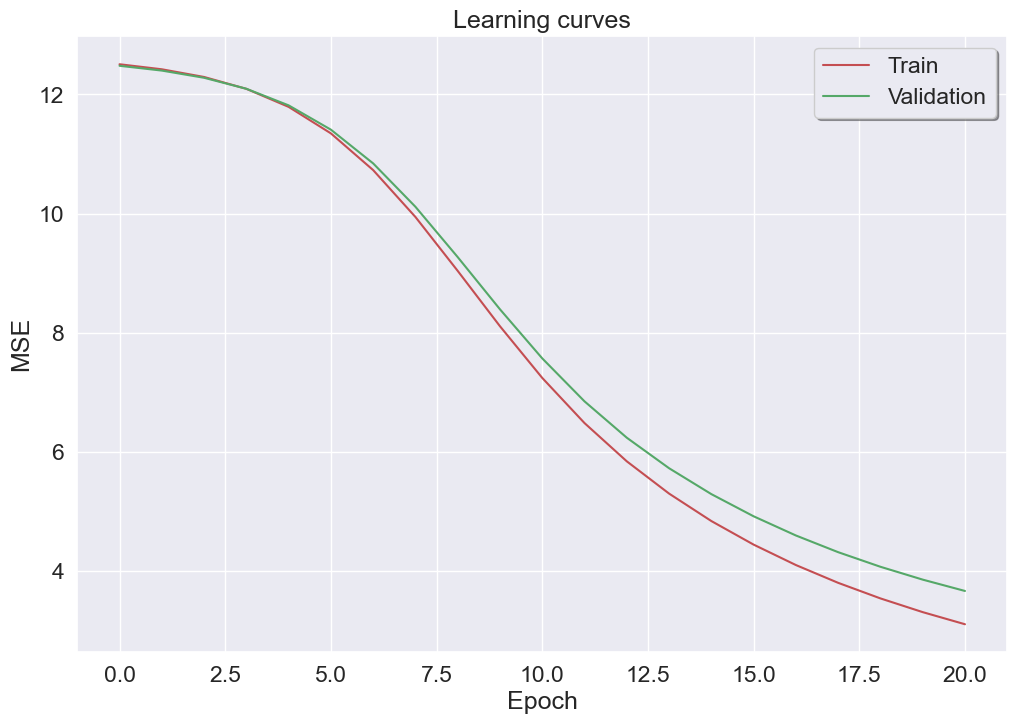

In [9]:
x = list(range(len(results_ml_small[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], results_ml_small[0][-k:], 'r', label="Train")
plt.plot(x[-k:], results_ml_small[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

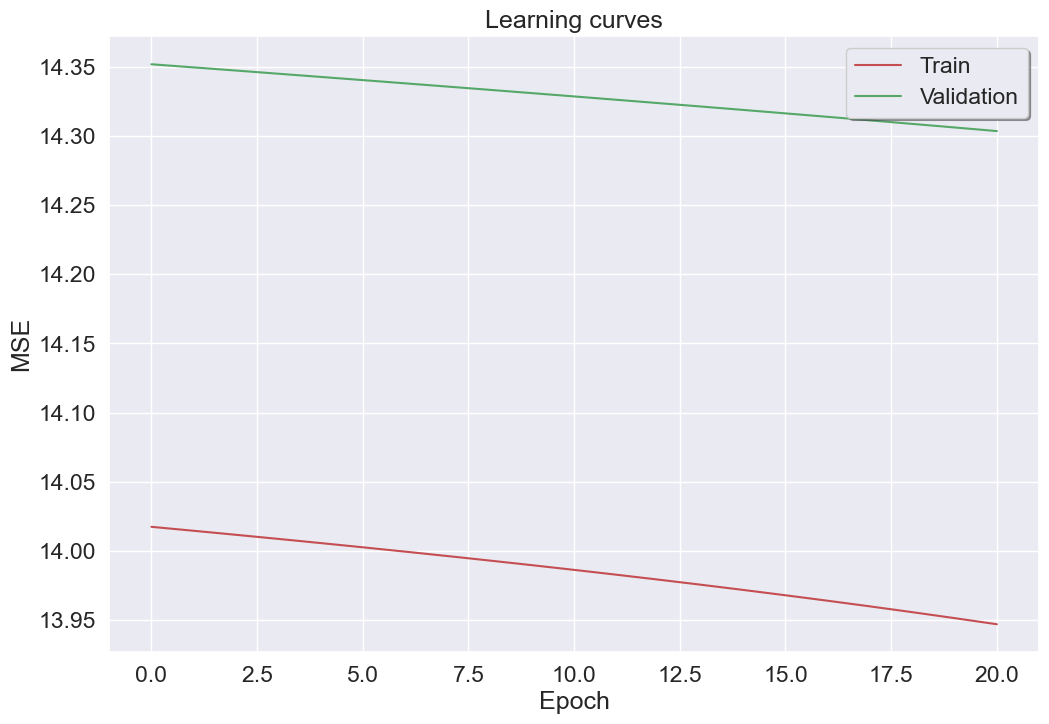

In [10]:
x = list(range(len(resuls_netflix[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], resuls_netflix[0][-k:], 'r', label="Train")
plt.plot(x[-k:], resuls_netflix[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

In [11]:
# svd_ml_small.data.info()

In [12]:
# svd_netflix.data.info()

In [13]:
# import pickle
# from pathlib import Path
# Path("./demo").mkdir(parents=True, exist_ok=True)
# with open(f'./demo/svd_ml_small.pkl', 'wb') as out:
#     pickle.dump(svd_ml_small, out, pickle.HIGHEST_PROTOCOL)
# with open(f'./demo/result_svd_ml_small.pkl', 'wb') as out:
#     pickle.dump(results_ml_small, out, pickle.HIGHEST_PROTOCOL)

# with open(f'./demo/svd_ml_small.pkl', 'wb') as out:
#     pickle.dump(svd_netflix, out, pickle.HIGHEST_PROTOCOL)
# with open(f'./demo/resuls_netflix.pkl', 'wb') as out:
#     pickle.dump(resuls_netflix, out, pickle.HIGHEST_PROTOCOL)

In [14]:
# with open('./demo/svd_ml_small.pkl', 'rb') as inp:
    # loaded_svd = pickle.load(inp)

In [15]:
# loaded_svd._P

In [16]:
# svd_ml_small._P